# Filters and Edge Detection.
Following: 
1. https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html
2. https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/
3. https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
4. https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

Acknowlegement: Image by Tomascastelazo, CC BY-SA 3.0 <https://creativecommons.org/licenses/by-sa/3.0>, via Wikimedia Commons

In [24]:
%pip install matplotlib
%pip3 install opencv-python
%pip install numpy



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%pip3` not found.


In [25]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [26]:
## Function to display image using Matplotlib
def display_image(image1, strng):
    image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB) ##BGR to RGB conversion for display using Matplotlib
    plt.title(strng)
    plt.imshow(image)
    plt.show()


## Read Image

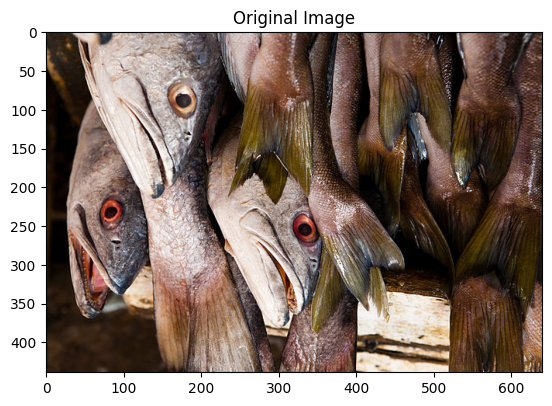

In [27]:
img = cv2.imread("fish.jpg")
img2 = img.copy()
display_image(img, "Original Image")

## Blurring Image

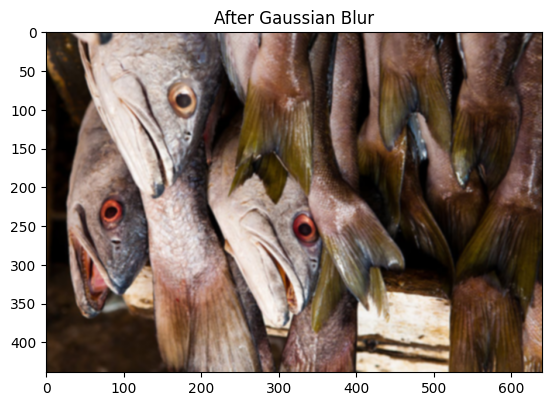

In [28]:
img = cv2.GaussianBlur(img, (5, 5), 0) # Adding Gaussian Blur with 3 x 3 filter size
display_image(img, "After Gaussian Blur")

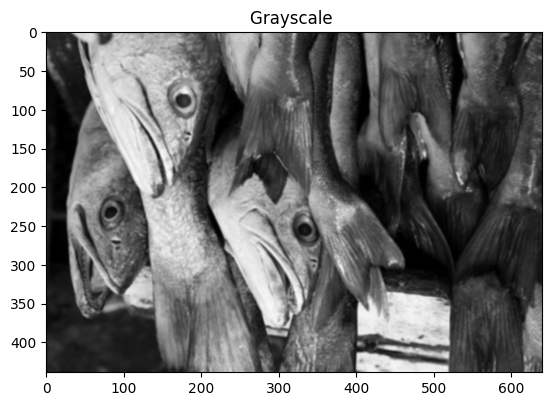

In [31]:
src_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_image(src_gray, "Grayscale ")

#Subtracting Original Image from Blurred Versions

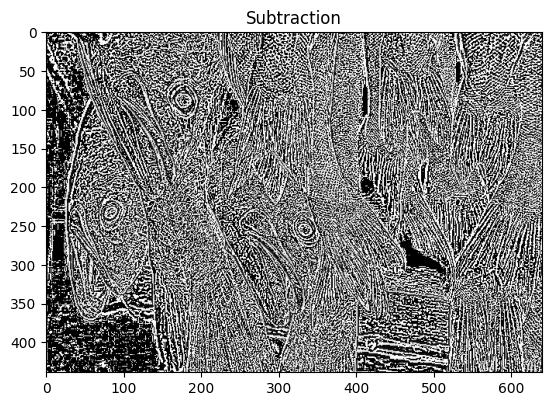

In [33]:
src_original = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = src_original - src_gray
display_image(img3, "Subtraction")

## Using Median Blur

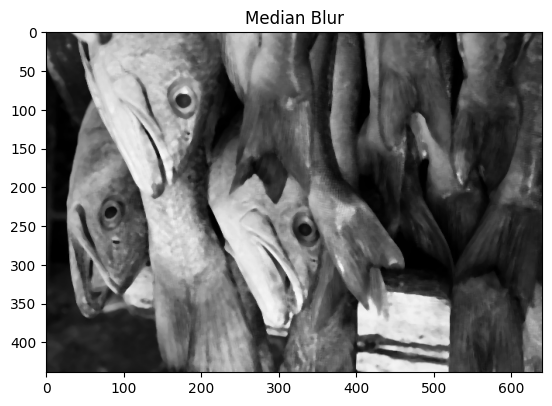

In [34]:
src_original = cv2.medianBlur(src_original, 5)
display_image(src_original, "Median Blur")

## Define Variables

In [35]:
ddepth = cv2.CV_16S  ## To prevent overflow
kernel_size = 3

## Laplacian Operator

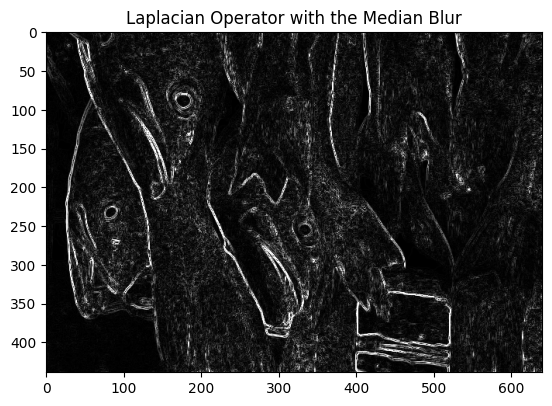

In [36]:
dst = cv2.Laplacian(src_original, ddepth, ksize=kernel_size)
abs_dst = cv2.convertScaleAbs(dst)
display_image(abs_dst, "Laplacian Operator with the Median Blur")


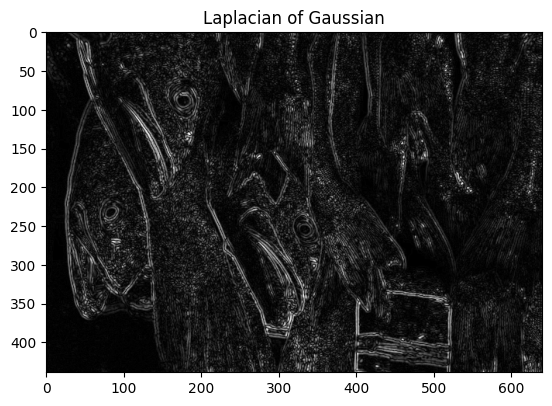

In [37]:
dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
abs_dst = cv2.convertScaleAbs(dst)
display_image(abs_dst, "Laplacian of Gaussian")

## Sobel Filter

In [38]:
scale = 1
delta = 0

In [39]:
grad_x = cv2.Sobel(src_gray, ddepth, 1, 0, ksize=kernel_size, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(src_gray, ddepth, 0, 1, ksize=kernel_size, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

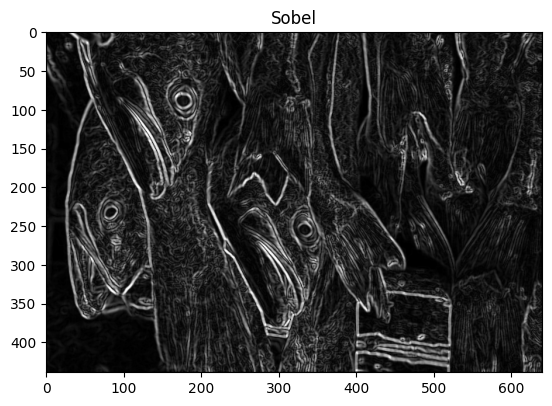

In [40]:
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0) ## approximating gradient
display_image(grad, "Sobel")